# Probability and statistics - Chapter 10: Data on a continuous variable

**need to update**

Using the textbook by Wild & Seber as a guide, I document some statistical lessons in this notebook.

The primary emphasis of the chapter is on the nature of confidence intervals and interpreting CIs in the context of a practical investigation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
from scipy import integrate, stats

# Code formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

## Introduction

Chapter 7 talked informally about using a two-standard-error interval as an interval estimate of an unknown parameter. We now take a close look at this idea and consier intervals of varying widths. The width will depend on how much "confidence" we want to have in the interval as a means of capturing the true value of the parameter. The following example introduces the ideas.

**Example. Estimating the speed of light.**

In 1882, Newcomb attempted to measure the speed of light by passing light from its source onto a rapidly rotating mirror that would be picked up by a distant fixed mirror. The observations are passage times for the light to travel from Fort Myer on the west bank of the Potomoac river to a fixed mirror at the foot of the Washington Monument 3721 m away and back (in ms). There are 20 observations corresponding to 20 repetitions of the measurement procedure. Imagine also that he only used a subset of the data with 8 replications.


In [29]:
data_set_20 = pd.Series(
    [
        24.824,
        24.828,
        24.837,
        24.832,
        24.820,
        24.825,
        24.825,
        24.836,
        24.836,
        24.821,
        24.828,
        24.826,
        24.832,
        24.828,
        24.826,
        24.830,
        24.836,
        24.829,
        24.830,
        24.822,
    ]
)

<IPython.core.display.Javascript object>

In [27]:
data_set_8 = pd.Series(data_set_20).iloc[[0, 2, 5, 7, 12, 14, 18, 19]]

<IPython.core.display.Javascript object>

*See pg. 238*

**Is a two-standard error-interval larger or smaller when the sample size is small compared to when it is large?**

SE is larger (since $\sqrt{n}$ would be smaller), therefore making the two-standard-error interval larger. 

In sections 7.2.3 and 7.6, we know that a two-standard-error interval captures the true mean for approximately 19 out of every 20 samples taken when we have large samples. Instead of always using two standard errors on either side of estimate, we take sample size into account.

We shall think generally about estimating a population parameter $\theta$ using a data estimate $\hat{\theta}$. The defining property of a 95% confidence interval for a parameter $\theta$  is as follows.

**A type of interval that contains the true value of a parameter for 95% of samples taken is called a 95% confidence interval for that parameter.**

(95% CI for $\theta$):      $\hat{\theta} \pm t_{df}(0.025)se(\hat{\theta})$

A confidence interval (CI) for the true value of a parameter is given by:
<br>
**estimate $\pm$ t standard errors**

**confidence limits:** The endpoints of a confidence interval.
<br>
**margin of error:** The piece being added and subtracted.


### Adjusting the confidence level


### How can we make a precise statement with confidence?


### Conservative confidence intervals

## Means

## Proportions

## Comparing two means

## Comparing two proportions


### Independence case


### Other common comparisons


### "Margins of error" in media reports

## How big should my study be?

### Proportions


### Means



## Summary

## Review exercises

### Question 1.

A new batch of ore is to be tested for its nickel content to determine whether it is consistent with th eusual mean content of 3.25% that has been found for previous batches. Ten samples are taken with the following results:

In [125]:
new_batch = pd.Series([3.27, 3.23, 3.31, 3.34, 3.26, 3.24, 3.25, 3.37, 3.29, 3.33])

<IPython.core.display.Javascript object>

(a) Obtain a dot plot for these data. Anything to suggest that the data may not be normally distributed?
*Normal distribution seems like a reasonable assumption.*

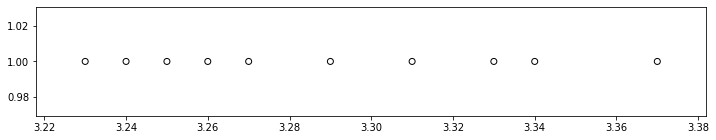

<IPython.core.display.Javascript object>

In [126]:
f, ax1 = plt.subplots(figsize=(12, 2))
ax1.scatter(new_batch, [1] * len(new_batch), facecolors="none", edgecolors="k")

(b) Find the sample mean and standard deviation for the 10 observations.

In [127]:
print("mean: ", new_batch.mean(), "std: ", new_batch.std())

mean:  3.289 std:  0.04701063709417264


<IPython.core.display.Javascript object>

(c) Obtain a 95% confidence for the mean content of this batch. Is there any evidence that this batch differs from previous batches?

*For a 95% CI, I need to get the t-statistic that avoids the highest and lowest 0.025.*

In [128]:
from scipy.stats import t

t_val_df10 = t.ppf(q=0.975, df=10)
print(t_val_df10)

2.2281388519649385


<IPython.core.display.Javascript object>

In [129]:
lower_bound = new_batch.mean() - t_val_df10 * (new_batch.std() / np.sqrt(10))
upper_bound = new_batch.mean() + t_val_df10 * (new_batch.std() / np.sqrt(10))

print("Lower and upper bound: ", lower_bound, upper_bound)

Lower and upper bound:  3.255876334648118 3.3221236653518824


<IPython.core.display.Javascript object>

*There is evidence that the batch is different, since the usual mean content is 3.25%.*

(d) Draw confidence interval on your dot plot. If you had 40 observations with the same sample mean and SD, what would that look like?

3.273977277206439 3.3040227227935612


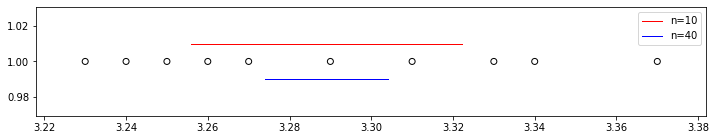

<IPython.core.display.Javascript object>

In [133]:
f, ax1 = plt.subplots(figsize=(12, 2))

ax1.scatter(new_batch, [1] * len(new_batch), facecolors="none", edgecolors="k")
ax1.plot([lower_bound, upper_bound], [1.01, 1.01], linewidth=1, color="r", label="n=10")


t_val_df40 = t.ppf(q=0.975, df=40)
lower_bound_40 = new_batch.mean() - t_val_df40 * (new_batch.std() / np.sqrt(40))
upper_bound_40 = new_batch.mean() + t_val_df40 * (new_batch.std() / np.sqrt(40))
ax1.plot(
    [lower_bound_40, upper_bound_40], [0.99, 0.99], linewidth=1, color="b", label="n=40"
)
ax1.legend()

print(lower_bound_40, upper_bound_40)

There's 4x as many samples. If the multiplier didn't change, then that would translate to the width of the interval getting divided roughly in half (square root relationship in denominator).

(e) If the original 10 observations represent a pilot sample, what sample size would you need to obtain a 95% CI with margin of error no greater than 0.015?

In [131]:
# From trying different values
for n in range(10, 55, 5):
    t_val_df = t.ppf(q=0.975, df=n)
    m_of_e = t_val_df * (new_batch.std() / np.sqrt(n))
    print(n, m_of_e)

10 0.03312366535188211
15 0.02587173558826408
20 0.021927435032804764
25 0.01936404389698853
30 0.01752867906845273
35 0.016131741047443634
40 0.015022722793560884
45 0.014114699589829674
50 0.01335351970894271


<IPython.core.display.Javascript object>

In [134]:
# From formula
# z is the multiplier appropriate for the confidence level (when n is large t ~= z)
# sigma_star is the estimate of variability:
# could just be sigma from a "pilot"
# could be (maximum imaginable measurement - minimum imaginable measurement)/6
# Rationale is that virtually all observations fall within 3sigma on either side of the mean
# m is margin of error
# sigma_star = (max(new_batch) - min(new_batch)) / 6

sigma_star = new_batch.std()
z = 1.96
m = 0.015

est_sample_size = ((z * sigma_star) / m) ** 2

print(est_sample_size)

37.7330488888889


<IPython.core.display.Javascript object>

### Question 9.

A study asked whether some differences in health problems could be caused by differences in diet between smokers and non-smokers. A survey was performed on 9003 British adults. (part b) Using only the data on nonmanual workers, obtain a 95% confidence interval for the true diffrence in proportions between ex-smokers and smokers consuming breakfast. Repeat for the other dietary habits. Interpret your intervals.

In [2]:
df = pd.DataFrame(
    {
        "smokers": [404, 0.629, 0.354, 0.594, 0.282],
        "exsmokers": [517, 0.824, 0.536, 0.776, 0.162],
    }
)

df.index = [
    "n_group",
    "prop_consuming_breakfast",
    "prop_consuming_brownbread",
    "prop_consuming_freshfruit",
    "prop_consuming_friedfood",
]

<IPython.core.display.Javascript object>

In [3]:
df

,smokers,exsmokers
n_group,404.000,517.000
prop_consuming_breakfast,0.629,0.824
prop_consuming_brownbread,0.354,0.536
prop_consuming_freshfruit,0.594,0.776
prop_consuming_friedfood,0.282,0.162


<IPython.core.display.Javascript object>

The 95% confidence interval of the difference in the proportion consuming breakfast between smokers and non-smokers would be:

p(smokers) - p(exsmokers) +/- 1.96 $\times $ square_root(se_diff)

In [14]:
p_diff = 0.824-.629
print(p_diff)

0.19499999999999995


<IPython.core.display.Javascript object>

 $se(\hat{p_1} - \hat{p_2})$ = $\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$ 

In [17]:
se_diff = np.sqrt((0.629*(1-0.629))/404 + (0.824*(1-0.824))/517)

<IPython.core.display.Javascript object>

In [18]:
se_diff

0.029293888875097915

<IPython.core.display.Javascript object>

In [13]:
# not needed
sample_size = df.loc['n_group', :].sum() - 2
print(sample_size)

919.0


<IPython.core.display.Javascript object>

In [19]:
print("Difference in proportions ({0:0.4f}) +/- 1.96 * standard error of difference ({1:0.5f})".format(p_diff, se_diff))

Difference in proportions (0.1950) +/- 1.96 * standard error of difference (0.02929)


<IPython.core.display.Javascript object>

In [21]:
print(p_diff-1.96*se_diff, p_diff+1.96*se_diff)

0.13758397780480802 0.2524160221951919


<IPython.core.display.Javascript object>